In [1]:
import os
from src import train

data_name = "test"
config_filepath = os.path.join("configs", f"{data_name}.yaml")
train.run(
    config_filepath=config_filepath
)

      smiles     tg
0        *C* -120.0
1       *CC* -120.0
2    *CC(*)C   -3.0
3   *CC(*)CC  -24.1
4  *CC(*)CCC  -37.0
2024-04-02 17:47:05 | INFO |    OS: Windows


Seed set to 1


2024-04-02 17:47:05 | INFO |    precision is 32
2024-04-02 17:47:05 | INFO |    ***Sampling and splitting of the dataset.***
2024-04-02 17:47:05 | INFO |    Train/valid/test splits:0.80/0.10/0.10
2024-04-02 17:47:05 | INFO |    Setup Polymer Tokens.
2024-04-02 17:47:05 | INFO |    ***Data augmentation is True.***
2024-04-02 17:47:05 | INFO |    Augmented SMILES data size:
2024-04-02 17:50:45 | INFO |    	Training set   | 53168
2024-04-02 17:50:45 | INFO |    	Validation set | 6665
2024-04-02 17:50:45 | INFO |    	Test set       | 6635


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: ./reports/test\bayes_opt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 2.1 K 
---------------------------------------------------
2.1 K     Trainable params
0         Non-trainable params
2.1 K     Total params
0.008     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 1661/1661 [00:43<00:00, 38.55it/s, loss=0.023, val_loss=0.017, val_r2=0.805]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 18:00:09 | INFO |    Trial 0 finished with value: 0.01695992797613144 and parameters: {'n_conv_hidden_layer': 3, 'n_dense_hidden_layer': 4, 'n_graph_dim': 3, 'n_dense_dim': 4, 'drop_rate': 0.1, 'n_batch_size': 5, 'learning_rate': 0.0003620600725744741}. Best is trial 0 with value: 0.01695992797613144 and R2: 0.8051527738571167.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 7.2 K 
---------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 830/830 [00:21<00:00, 38.22it/s, loss=0.022, val_loss=0.017, val_r2=0.807]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 18:06:06 | INFO |    Trial 1 finished with value: 0.016782231628894806 and parameters: {'n_conv_hidden_layer': 2, 'n_dense_hidden_layer': 2, 'n_graph_dim': 5, 'n_dense_dim': 5, 'drop_rate': 0.4, 'n_batch_size': 6, 'learning_rate': 0.043087600478391316}. Best is trial 1 with value: 0.016782231628894806 and R2: 0.8071942925453186.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 8.3 K 
---------------------------------------------------
8.3 K     Trainable params
0         Non-trainable params
8.3 K     Total params
0.033     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 830/830 [00:21<00:00, 38.61it/s, loss=0.018, val_loss=0.015, val_r2=0.827]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 18:11:55 | INFO |    Trial 2 finished with value: 0.015038911253213882 and parameters: {'n_conv_hidden_layer': 1, 'n_dense_hidden_layer': 4, 'n_graph_dim': 5, 'n_dense_dim': 5, 'drop_rate': 0.1, 'n_batch_size': 6, 'learning_rate': 0.025248390936171015}. Best is trial 2 with value: 0.015038911253213882 and R2: 0.8272227644920349.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 66.8 K
---------------------------------------------------
66.8 K    Trainable params
0         Non-trainable params
66.8 K    Total params
0.267     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 1661/1661 [00:38<00:00, 43.36it/s, loss=0.023, val_loss=0.016, val_r2=0.813]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 18:20:54 | INFO |    Trial 3 finished with value: 0.016319725662469864 and parameters: {'n_conv_hidden_layer': 5, 'n_dense_hidden_layer': 2, 'n_graph_dim': 6, 'n_dense_dim': 7, 'drop_rate': 0.5, 'n_batch_size': 5, 'learning_rate': 0.0001309677449377761}. Best is trial 2 with value: 0.015038911253213882 and R2: 0.8272227644920349.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 6.5 K 
---------------------------------------------------
6.5 K     Trainable params
0         Non-trainable params
6.5 K     Total params
0.026     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 207/207 [00:05<00:00, 39.56it/s, loss=0.026, val_loss=0.019, val_r2=0.787]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 18:24:17 | INFO |    Trial 4 finished with value: 0.01856410689651966 and parameters: {'n_conv_hidden_layer': 1, 'n_dense_hidden_layer': 5, 'n_graph_dim': 3, 'n_dense_dim': 5, 'drop_rate': 0.5, 'n_batch_size': 8, 'learning_rate': 0.011902312313548788}. Best is trial 2 with value: 0.015038911253213882 and R2: 0.8272227644920349.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 41.1 K
---------------------------------------------------
41.1 K    Trainable params
0         Non-trainable params
41.1 K    Total params
0.164     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 51/51 [00:07<00:00,  6.68it/s, loss=0.040, val_loss=0.021, val_r2=0.754]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 18:27:55 | INFO |    Trial 5 finished with value: 0.02139696292579174 and parameters: {'n_conv_hidden_layer': 2, 'n_dense_hidden_layer': 4, 'n_graph_dim': 7, 'n_dense_dim': 3, 'drop_rate': 0.4, 'n_batch_size': 10, 'learning_rate': 0.017558886158773757}. Best is trial 2 with value: 0.015038911253213882 and R2: 0.8272227644920349.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 5.4 K 
---------------------------------------------------
5.4 K     Trainable params
0         Non-trainable params
5.4 K     Total params
0.022     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 830/830 [00:20<00:00, 40.82it/s, loss=0.034, val_loss=0.022, val_r2=0.751]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 18:33:39 | INFO |    Trial 6 finished with value: 0.02164350263774395 and parameters: {'n_conv_hidden_layer': 2, 'n_dense_hidden_layer': 4, 'n_graph_dim': 3, 'n_dense_dim': 5, 'drop_rate': 0.5, 'n_batch_size': 6, 'learning_rate': 0.0007300053042915264}. Best is trial 2 with value: 0.015038911253213882 and R2: 0.8272227644920349.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 8.8 K 
---------------------------------------------------
8.8 K     Trainable params
0         Non-trainable params
8.8 K     Total params
0.035     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 415/415 [00:10<00:00, 40.87it/s, loss=0.033, val_loss=0.020, val_r2=0.773]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 18:37:46 | INFO |    Trial 7 finished with value: 0.019732486456632614 and parameters: {'n_conv_hidden_layer': 1, 'n_dense_hidden_layer': 1, 'n_graph_dim': 6, 'n_dense_dim': 4, 'drop_rate': 0.2, 'n_batch_size': 7, 'learning_rate': 0.00014457314723643997}. Best is trial 2 with value: 0.015038911253213882 and R2: 0.8272227644920349.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 11.5 K
---------------------------------------------------
11.5 K    Trainable params
0         Non-trainable params
11.5 K    Total params
0.046     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 415/415 [00:11<00:00, 37.25it/s, loss=0.013, val_loss=0.013, val_r2=0.854]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 18:41:56 | INFO |    Trial 8 finished with value: 0.01267507765442133 and parameters: {'n_conv_hidden_layer': 3, 'n_dense_hidden_layer': 1, 'n_graph_dim': 5, 'n_dense_dim': 6, 'drop_rate': 0.1, 'n_batch_size': 7, 'learning_rate': 0.012111570825917514}. Best is trial 8 with value: 0.01267507765442133 and R2: 0.8543801307678223.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 11.5 K
---------------------------------------------------
11.5 K    Trainable params
0         Non-trainable params
11.5 K    Total params
0.046     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 51/51 [00:02<00:00, 17.57it/s, loss=0.019, val_loss=0.015, val_r2=0.832]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 18:44:49 | INFO |    Trial 9 finished with value: 0.014601007103919983 and parameters: {'n_conv_hidden_layer': 3, 'n_dense_hidden_layer': 1, 'n_graph_dim': 5, 'n_dense_dim': 6, 'drop_rate': 0.30000000000000004, 'n_batch_size': 10, 'learning_rate': 0.005749963945531071}. Best is trial 8 with value: 0.01267507765442133 and R2: 0.8543801307678223.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 19.1 K
---------------------------------------------------
19.1 K    Trainable params
0         Non-trainable params
19.1 K    Total params
0.077     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 1661/1661 [00:43<00:00, 38.29it/s, loss=0.026, val_loss=1.324, val_r2=-14.210]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 18:54:13 | INFO |    Trial 10 finished with value: 1.323923110961914 and parameters: {'n_conv_hidden_layer': 5, 'n_dense_hidden_layer': 1, 'n_graph_dim': 3, 'n_dense_dim': 7, 'drop_rate': 0.2, 'n_batch_size': 5, 'learning_rate': 0.060607412224906856}. Best is trial 8 with value: 0.01267507765442133 and R2: 0.8543801307678223.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 87.4 K
---------------------------------------------------
87.4 K    Trainable params
0         Non-trainable params
87.4 K    Total params
0.350     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 103/103 [00:04<00:00, 22.20it/s, loss=0.024, val_loss=0.019, val_r2=0.782]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 18:57:20 | INFO |    Trial 11 finished with value: 0.01898895390331745 and parameters: {'n_conv_hidden_layer': 2, 'n_dense_hidden_layer': 4, 'n_graph_dim': 6, 'n_dense_dim': 7, 'drop_rate': 0.4, 'n_batch_size': 9, 'learning_rate': 0.0011135123186253584}. Best is trial 8 with value: 0.01267507765442133 and R2: 0.8543801307678223.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 92.2 K
---------------------------------------------------
92.2 K    Trainable params
0         Non-trainable params
92.2 K    Total params
0.369     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 207/207 [00:05<00:00, 37.04it/s, loss=0.037, val_loss=0.027, val_r2=0.695]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 19:00:40 | INFO |    Trial 12 finished with value: 0.026527127251029015 and parameters: {'n_conv_hidden_layer': 2, 'n_dense_hidden_layer': 5, 'n_graph_dim': 5, 'n_dense_dim': 7, 'drop_rate': 0.4, 'n_batch_size': 8, 'learning_rate': 0.0002209214672153881}. Best is trial 8 with value: 0.01267507765442133 and R2: 0.8543801307678223.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 11.6 K
---------------------------------------------------
11.6 K    Trainable params
0         Non-trainable params
11.6 K    Total params
0.047     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 51/51 [00:03<00:00, 12.75it/s, loss=0.020, val_loss=0.014, val_r2=0.838]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 19:03:43 | INFO |    Trial 13 finished with value: 0.014063142240047455 and parameters: {'n_conv_hidden_layer': 5, 'n_dense_hidden_layer': 3, 'n_graph_dim': 5, 'n_dense_dim': 5, 'drop_rate': 0.2, 'n_batch_size': 10, 'learning_rate': 0.005260638512072054}. Best is trial 8 with value: 0.01267507765442133 and R2: 0.8543801307678223.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 6.2 K 
---------------------------------------------------
6.2 K     Trainable params
0         Non-trainable params
6.2 K     Total params
0.025     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 415/415 [00:10<00:00, 40.27it/s, loss=0.025, val_loss=0.018, val_r2=0.796]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 19:07:50 | INFO |    Trial 14 finished with value: 0.01776108331978321 and parameters: {'n_conv_hidden_layer': 1, 'n_dense_hidden_layer': 4, 'n_graph_dim': 4, 'n_dense_dim': 5, 'drop_rate': 0.5, 'n_batch_size': 7, 'learning_rate': 0.053162506982005885}. Best is trial 8 with value: 0.01267507765442133 and R2: 0.8543801307678223.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 86.0 K
---------------------------------------------------
86.0 K    Trainable params
0         Non-trainable params
86.0 K    Total params
0.344     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 830/830 [00:20<00:00, 39.72it/s, loss=0.021, val_loss=0.015, val_r2=0.827]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 19:13:41 | INFO |    Trial 15 finished with value: 0.015022998675704002 and parameters: {'n_conv_hidden_layer': 4, 'n_dense_hidden_layer': 1, 'n_graph_dim': 7, 'n_dense_dim': 6, 'drop_rate': 0.5, 'n_batch_size': 6, 'learning_rate': 0.0002578738171385281}. Best is trial 8 with value: 0.01267507765442133 and R2: 0.8543801307678223.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 18.7 K
---------------------------------------------------
18.7 K    Trainable params
0         Non-trainable params
18.7 K    Total params
0.075     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 51/51 [00:01<00:00, 28.05it/s, loss=0.023, val_loss=0.017, val_r2=0.804]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 19:16:21 | INFO |    Trial 16 finished with value: 0.01704324595630169 and parameters: {'n_conv_hidden_layer': 5, 'n_dense_hidden_layer': 4, 'n_graph_dim': 3, 'n_dense_dim': 6, 'drop_rate': 0.4, 'n_batch_size': 10, 'learning_rate': 0.013632461375504066}. Best is trial 8 with value: 0.01267507765442133 and R2: 0.8543801307678223.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 657   
---------------------------------------------------
657       Trainable params
0         Non-trainable params
657       Total params
0.003     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 51/51 [00:01<00:00, 29.11it/s, loss=0.029, val_loss=0.020, val_r2=0.774]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 19:19:04 | INFO |    Trial 17 finished with value: 0.019604206085205078 and parameters: {'n_conv_hidden_layer': 1, 'n_dense_hidden_layer': 1, 'n_graph_dim': 3, 'n_dense_dim': 3, 'drop_rate': 0.2, 'n_batch_size': 10, 'learning_rate': 0.00413516832983145}. Best is trial 8 with value: 0.01267507765442133 and R2: 0.8543801307678223.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 2.4 K 
---------------------------------------------------
2.4 K     Trainable params
0         Non-trainable params
2.4 K     Total params
0.009     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 51/51 [00:01<00:00, 27.80it/s, loss=0.033, val_loss=0.021, val_r2=0.757]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 19:21:46 | INFO |    Trial 18 finished with value: 0.021106339991092682 and parameters: {'n_conv_hidden_layer': 3, 'n_dense_hidden_layer': 5, 'n_graph_dim': 3, 'n_dense_dim': 4, 'drop_rate': 0.30000000000000004, 'n_batch_size': 10, 'learning_rate': 0.004820484133908542}. Best is trial 8 with value: 0.01267507765442133 and R2: 0.8543801307678223.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 87.5 K
---------------------------------------------------
87.5 K    Trainable params
0         Non-trainable params
87.5 K    Total params
0.350     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 51/51 [00:01<00:00, 28.05it/s, loss=0.019, val_loss=0.016, val_r2=0.816]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 19:24:46 | INFO |    Trial 19 finished with value: 0.01598224975168705 and parameters: {'n_conv_hidden_layer': 1, 'n_dense_hidden_layer': 5, 'n_graph_dim': 4, 'n_dense_dim': 7, 'drop_rate': 0.2, 'n_batch_size': 10, 'learning_rate': 0.017432710909292645}. Best is trial 8 with value: 0.01267507765442133 and R2: 0.8543801307678223.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 833   
---------------------------------------------------
833       Trainable params
0         Non-trainable params
833       Total params
0.003     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 1661/1661 [00:41<00:00, 39.77it/s, loss=0.023, val_loss=0.017, val_r2=0.807]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 19:34:22 | INFO |    Trial 20 finished with value: 0.01677221804857254 and parameters: {'n_conv_hidden_layer': 3, 'n_dense_hidden_layer': 1, 'n_graph_dim': 3, 'n_dense_dim': 3, 'drop_rate': 0.1, 'n_batch_size': 5, 'learning_rate': 0.00047547535988922844}. Best is trial 8 with value: 0.01267507765442133 and R2: 0.8543801307678223.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 1.1 K 
---------------------------------------------------
1.1 K     Trainable params
0         Non-trainable params
1.1 K     Total params
0.004     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 207/207 [00:07<00:00, 29.30it/s, loss=0.104, val_loss=0.066, val_r2=0.246]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 19:37:58 | INFO |    Trial 21 finished with value: 0.06561151146888733 and parameters: {'n_conv_hidden_layer': 4, 'n_dense_hidden_layer': 3, 'n_graph_dim': 3, 'n_dense_dim': 3, 'drop_rate': 0.5, 'n_batch_size': 8, 'learning_rate': 0.00040726745242791637}. Best is trial 8 with value: 0.01267507765442133 and R2: 0.8543801307678223.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 5.4 K 
---------------------------------------------------
5.4 K     Trainable params
0         Non-trainable params
5.4 K     Total params
0.022     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 51/51 [00:01<00:00, 28.84it/s, loss=0.136, val_loss=0.076, val_r2=0.124]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 19:40:43 | INFO |    Trial 22 finished with value: 0.0760689228773117 and parameters: {'n_conv_hidden_layer': 2, 'n_dense_hidden_layer': 4, 'n_graph_dim': 3, 'n_dense_dim': 5, 'drop_rate': 0.5, 'n_batch_size': 10, 'learning_rate': 0.0005242558404972403}. Best is trial 8 with value: 0.01267507765442133 and R2: 0.8543801307678223.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 57.9 K
---------------------------------------------------
57.9 K    Trainable params
0         Non-trainable params
57.9 K    Total params
0.231     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 1661/1661 [00:42<00:00, 39.16it/s, loss=0.023, val_loss=0.016, val_r2=0.810]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 19:50:22 | INFO |    Trial 23 finished with value: 0.016498925164341927 and parameters: {'n_conv_hidden_layer': 3, 'n_dense_hidden_layer': 4, 'n_graph_dim': 7, 'n_dense_dim': 3, 'drop_rate': 0.1, 'n_batch_size': 5, 'learning_rate': 0.002877632520197786}. Best is trial 8 with value: 0.01267507765442133 and R2: 0.8543801307678223.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 54.8 K
---------------------------------------------------
54.8 K    Trainable params
0         Non-trainable params
54.8 K    Total params
0.219     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 415/415 [00:11<00:00, 36.72it/s, loss=0.015, val_loss=0.013, val_r2=0.850]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 19:55:02 | INFO |    Trial 24 finished with value: 0.013084297999739647 and parameters: {'n_conv_hidden_layer': 4, 'n_dense_hidden_layer': 3, 'n_graph_dim': 4, 'n_dense_dim': 7, 'drop_rate': 0.30000000000000004, 'n_batch_size': 7, 'learning_rate': 0.004496190020585656}. Best is trial 8 with value: 0.01267507765442133 and R2: 0.8543801307678223.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 2.5 K 
---------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 207/207 [00:06<00:00, 34.38it/s, loss=0.051, val_loss=0.030, val_r2=0.661]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 19:58:31 | INFO |    Trial 25 finished with value: 0.029507288709282875 and parameters: {'n_conv_hidden_layer': 4, 'n_dense_hidden_layer': 4, 'n_graph_dim': 4, 'n_dense_dim': 3, 'drop_rate': 0.2, 'n_batch_size': 8, 'learning_rate': 0.00042709258331689805}. Best is trial 8 with value: 0.01267507765442133 and R2: 0.8543801307678223.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 21.3 K
---------------------------------------------------
21.3 K    Trainable params
0         Non-trainable params
21.3 K    Total params
0.085     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 207/207 [00:05<00:00, 36.27it/s, loss=0.014, val_loss=0.013, val_r2=0.851]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 20:02:13 | INFO |    Trial 26 finished with value: 0.012980204075574875 and parameters: {'n_conv_hidden_layer': 4, 'n_dense_hidden_layer': 1, 'n_graph_dim': 4, 'n_dense_dim': 7, 'drop_rate': 0.1, 'n_batch_size': 8, 'learning_rate': 0.003749824371356465}. Best is trial 8 with value: 0.01267507765442133 and R2: 0.8543801307678223.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 10.2 K
---------------------------------------------------
10.2 K    Trainable params
0         Non-trainable params
10.2 K    Total params
0.041     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 51/51 [00:01<00:00, 27.80it/s, loss=0.023, val_loss=0.017, val_r2=0.799]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 20:05:13 | INFO |    Trial 27 finished with value: 0.017460186034440994 and parameters: {'n_conv_hidden_layer': 5, 'n_dense_hidden_layer': 2, 'n_graph_dim': 3, 'n_dense_dim': 6, 'drop_rate': 0.4, 'n_batch_size': 10, 'learning_rate': 0.06250520841213072}. Best is trial 8 with value: 0.01267507765442133 and R2: 0.8543801307678223.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 49.6 K
---------------------------------------------------
49.6 K    Trainable params
0         Non-trainable params
49.6 K    Total params
0.198     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 207/207 [00:05<00:00, 35.65it/s, loss=0.017, val_loss=0.014, val_r2=0.834]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 20:08:51 | INFO |    Trial 28 finished with value: 0.014424402266740799 and parameters: {'n_conv_hidden_layer': 1, 'n_dense_hidden_layer': 2, 'n_graph_dim': 6, 'n_dense_dim': 7, 'drop_rate': 0.5, 'n_batch_size': 8, 'learning_rate': 0.055823755414885816}. Best is trial 8 with value: 0.01267507765442133 and R2: 0.8543801307678223.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 16.9 K
---------------------------------------------------
16.9 K    Trainable params
0         Non-trainable params
16.9 K    Total params
0.068     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 51/51 [00:03<00:00, 14.20it/s, loss=0.020, val_loss=0.016, val_r2=0.813]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 20:11:40 | INFO |    Trial 29 finished with value: 0.01622784696519375 and parameters: {'n_conv_hidden_layer': 4, 'n_dense_hidden_layer': 2, 'n_graph_dim': 5, 'n_dense_dim': 6, 'drop_rate': 0.30000000000000004, 'n_batch_size': 10, 'learning_rate': 0.05704273062008818}. Best is trial 8 with value: 0.01267507765442133 and R2: 0.8543801307678223.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 1.1 K 
---------------------------------------------------
1.1 K     Trainable params
0         Non-trainable params
1.1 K     Total params
0.004     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 207/207 [00:05<00:00, 36.59it/s, loss=0.112, val_loss=0.055, val_r2=0.373]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 20:15:06 | INFO |    Trial 30 finished with value: 0.05460638552904129 and parameters: {'n_conv_hidden_layer': 2, 'n_dense_hidden_layer': 5, 'n_graph_dim': 3, 'n_dense_dim': 3, 'drop_rate': 0.1, 'n_batch_size': 8, 'learning_rate': 0.00011603110169737989}. Best is trial 8 with value: 0.01267507765442133 and R2: 0.8543801307678223.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 1.4 K 
---------------------------------------------------
1.4 K     Trainable params
0         Non-trainable params
1.4 K     Total params
0.005     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 1661/1661 [00:46<00:00, 36.08it/s, loss=0.031, val_loss=0.019, val_r2=0.780]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 20:24:38 | INFO |    Trial 31 finished with value: 0.01915151998400688 and parameters: {'n_conv_hidden_layer': 5, 'n_dense_hidden_layer': 5, 'n_graph_dim': 3, 'n_dense_dim': 3, 'drop_rate': 0.2, 'n_batch_size': 5, 'learning_rate': 0.02682082153537788}. Best is trial 8 with value: 0.01267507765442133 and R2: 0.8543801307678223.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 92.2 K
---------------------------------------------------
92.2 K    Trainable params
0         Non-trainable params
92.2 K    Total params
0.369     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 51/51 [00:02<00:00, 20.64it/s, loss=0.029, val_loss=0.019, val_r2=0.777]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 20:27:40 | INFO |    Trial 32 finished with value: 0.019392387941479683 and parameters: {'n_conv_hidden_layer': 2, 'n_dense_hidden_layer': 5, 'n_graph_dim': 5, 'n_dense_dim': 7, 'drop_rate': 0.5, 'n_batch_size': 10, 'learning_rate': 0.0023968496779361048}. Best is trial 8 with value: 0.01267507765442133 and R2: 0.8543801307678223.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 6.8 K 
---------------------------------------------------
6.8 K     Trainable params
0         Non-trainable params
6.8 K     Total params
0.027     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 1661/1661 [00:41<00:00, 39.58it/s, loss=0.023, val_loss=0.017, val_r2=0.805]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 20:37:13 | INFO |    Trial 33 finished with value: 0.01697402633726597 and parameters: {'n_conv_hidden_layer': 3, 'n_dense_hidden_layer': 4, 'n_graph_dim': 4, 'n_dense_dim': 5, 'drop_rate': 0.30000000000000004, 'n_batch_size': 5, 'learning_rate': 0.0060317623845864395}. Best is trial 8 with value: 0.01267507765442133 and R2: 0.8543801307678223.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 88.1 K
---------------------------------------------------
88.1 K    Trainable params
0         Non-trainable params
88.1 K    Total params
0.352     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 830/830 [00:21<00:00, 38.07it/s, loss=0.019, val_loss=0.016, val_r2=0.817]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 20:43:13 | INFO |    Trial 34 finished with value: 0.015953905880451202 and parameters: {'n_conv_hidden_layer': 3, 'n_dense_hidden_layer': 5, 'n_graph_dim': 4, 'n_dense_dim': 7, 'drop_rate': 0.30000000000000004, 'n_batch_size': 6, 'learning_rate': 0.023109348472239197}. Best is trial 8 with value: 0.01267507765442133 and R2: 0.8543801307678223.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 12.6 K
---------------------------------------------------
12.6 K    Trainable params
0         Non-trainable params
12.6 K    Total params
0.050     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 1661/1661 [00:43<00:00, 38.04it/s, loss=0.026, val_loss=0.018, val_r2=0.788]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 20:52:44 | INFO |    Trial 35 finished with value: 0.018456216901540756 and parameters: {'n_conv_hidden_layer': 4, 'n_dense_hidden_layer': 1, 'n_graph_dim': 5, 'n_dense_dim': 6, 'drop_rate': 0.5, 'n_batch_size': 5, 'learning_rate': 0.08516819576644914}. Best is trial 8 with value: 0.01267507765442133 and R2: 0.8543801307678223.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 104 K 
---------------------------------------------------
104 K     Trainable params
0         Non-trainable params
104 K     Total params
0.417     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 207/207 [00:05<00:00, 35.77it/s, loss=0.021, val_loss=0.016, val_r2=0.818]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 20:56:11 | INFO |    Trial 36 finished with value: 0.01588250882923603 and parameters: {'n_conv_hidden_layer': 2, 'n_dense_hidden_layer': 5, 'n_graph_dim': 6, 'n_dense_dim': 7, 'drop_rate': 0.30000000000000004, 'n_batch_size': 8, 'learning_rate': 0.0007189999250101482}. Best is trial 8 with value: 0.01267507765442133 and R2: 0.8543801307678223.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 82.0 K
---------------------------------------------------
82.0 K    Trainable params
0         Non-trainable params
82.0 K    Total params
0.328     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 51/51 [00:09<00:00,  5.14it/s, loss=0.035, val_loss=0.022, val_r2=0.743]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 21:00:20 | INFO |    Trial 37 finished with value: 0.02233164943754673 and parameters: {'n_conv_hidden_layer': 3, 'n_dense_hidden_layer': 4, 'n_graph_dim': 7, 'n_dense_dim': 6, 'drop_rate': 0.4, 'n_batch_size': 10, 'learning_rate': 0.0009290583490713025}. Best is trial 8 with value: 0.01267507765442133 and R2: 0.8543801307678223.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 6.0 K 
---------------------------------------------------
6.0 K     Trainable params
0         Non-trainable params
6.0 K     Total params
0.024     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 830/830 [00:22<00:00, 36.37it/s, loss=0.020, val_loss=0.016, val_r2=0.818]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 21:06:26 | INFO |    Trial 38 finished with value: 0.01587231270968914 and parameters: {'n_conv_hidden_layer': 4, 'n_dense_hidden_layer': 3, 'n_graph_dim': 4, 'n_dense_dim': 5, 'drop_rate': 0.30000000000000004, 'n_batch_size': 6, 'learning_rate': 0.007341048676350364}. Best is trial 8 with value: 0.01267507765442133 and R2: 0.8543801307678223.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 16.9 K
---------------------------------------------------
16.9 K    Trainable params
0         Non-trainable params
16.9 K    Total params
0.068     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 415/415 [00:11<00:00, 36.91it/s, loss=0.028, val_loss=0.016, val_r2=0.814]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 21:10:41 | INFO |    Trial 39 finished with value: 0.016201458871364594 and parameters: {'n_conv_hidden_layer': 3, 'n_dense_hidden_layer': 5, 'n_graph_dim': 6, 'n_dense_dim': 3, 'drop_rate': 0.30000000000000004, 'n_batch_size': 7, 'learning_rate': 0.024712484610913372}. Best is trial 8 with value: 0.01267507765442133 and R2: 0.8543801307678223.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 27.1 K
---------------------------------------------------
27.1 K    Trainable params
0         Non-trainable params
27.1 K    Total params
0.108     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 51/51 [00:07<00:00,  6.77it/s, loss=0.029, val_loss=0.019, val_r2=0.786]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 21:14:22 | INFO |    Trial 40 finished with value: 0.018600454553961754 and parameters: {'n_conv_hidden_layer': 5, 'n_dense_hidden_layer': 5, 'n_graph_dim': 6, 'n_dense_dim': 4, 'drop_rate': 0.2, 'n_batch_size': 10, 'learning_rate': 0.0038295164457230364}. Best is trial 8 with value: 0.01267507765442133 and R2: 0.8543801307678223.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 30.0 K
---------------------------------------------------
30.0 K    Trainable params
0         Non-trainable params
30.0 K    Total params
0.120     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 207/207 [00:08<00:00, 24.39it/s, loss=0.025, val_loss=0.017, val_r2=0.806]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 21:18:13 | INFO |    Trial 41 finished with value: 0.016926608979701996 and parameters: {'n_conv_hidden_layer': 5, 'n_dense_hidden_layer': 3, 'n_graph_dim': 6, 'n_dense_dim': 5, 'drop_rate': 0.4, 'n_batch_size': 8, 'learning_rate': 0.0024953394681421145}. Best is trial 8 with value: 0.01267507765442133 and R2: 0.8543801307678223.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 1.6 K 
---------------------------------------------------
1.6 K     Trainable params
0         Non-trainable params
1.6 K     Total params
0.006     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 830/830 [00:26<00:00, 31.12it/s, loss=0.035, val_loss=0.020, val_r2=0.775]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 21:24:16 | INFO |    Trial 42 finished with value: 0.019572224467992783 and parameters: {'n_conv_hidden_layer': 2, 'n_dense_hidden_layer': 1, 'n_graph_dim': 4, 'n_dense_dim': 3, 'drop_rate': 0.5, 'n_batch_size': 6, 'learning_rate': 0.027263153774716022}. Best is trial 8 with value: 0.01267507765442133 and R2: 0.8543801307678223.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 7.8 K 
---------------------------------------------------
7.8 K     Trainable params
0         Non-trainable params
7.8 K     Total params
0.031     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 415/415 [00:11<00:00, 37.23it/s, loss=0.045, val_loss=0.028, val_r2=0.676]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 21:30:48 | INFO |    Trial 43 finished with value: 0.028159473091363907 and parameters: {'n_conv_hidden_layer': 5, 'n_dense_hidden_layer': 4, 'n_graph_dim': 5, 'n_dense_dim': 3, 'drop_rate': 0.30000000000000004, 'n_batch_size': 7, 'learning_rate': 0.0004732818756302549}. Best is trial 8 with value: 0.01267507765442133 and R2: 0.8543801307678223.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 106 K 
---------------------------------------------------
106 K     Trainable params
0         Non-trainable params
106 K     Total params
0.428     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 1661/1661 [00:41<00:00, 40.23it/s, loss=0.013, val_loss=0.011, val_r2=0.871]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 21:40:02 | INFO |    Trial 44 finished with value: 0.011238276027143002 and parameters: {'n_conv_hidden_layer': 3, 'n_dense_hidden_layer': 2, 'n_graph_dim': 7, 'n_dense_dim': 7, 'drop_rate': 0.2, 'n_batch_size': 5, 'learning_rate': 0.00037921734741614614}. Best is trial 44 with value: 0.011238276027143002 and R2: 0.870887041091919.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 3.2 K 
---------------------------------------------------
3.2 K     Trainable params
0         Non-trainable params
3.2 K     Total params
0.013     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 415/415 [00:10<00:00, 38.05it/s, loss=0.029, val_loss=0.017, val_r2=0.804]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 21:44:12 | INFO |    Trial 45 finished with value: 0.0170949324965477 and parameters: {'n_conv_hidden_layer': 3, 'n_dense_hidden_layer': 4, 'n_graph_dim': 4, 'n_dense_dim': 4, 'drop_rate': 0.5, 'n_batch_size': 7, 'learning_rate': 0.007080357743110291}. Best is trial 44 with value: 0.011238276027143002 and R2: 0.870887041091919.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 6.0 K 
---------------------------------------------------
6.0 K     Trainable params
0         Non-trainable params
6.0 K     Total params
0.024     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 207/207 [00:05<00:00, 37.91it/s, loss=0.013, val_loss=0.013, val_r2=0.849]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 21:47:25 | INFO |    Trial 46 finished with value: 0.013130075298249722 and parameters: {'n_conv_hidden_layer': 2, 'n_dense_hidden_layer': 1, 'n_graph_dim': 5, 'n_dense_dim': 5, 'drop_rate': 0.1, 'n_batch_size': 8, 'learning_rate': 0.004285784762532878}. Best is trial 44 with value: 0.011238276027143002 and R2: 0.870887041091919.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 21.6 K
---------------------------------------------------
21.6 K    Trainable params
0         Non-trainable params
21.6 K    Total params
0.086     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 103/103 [00:06<00:00, 15.69it/s, loss=0.134, val_loss=0.033, val_r2=0.622]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 21:50:51 | INFO |    Trial 47 finished with value: 0.032894425094127655 and parameters: {'n_conv_hidden_layer': 4, 'n_dense_hidden_layer': 1, 'n_graph_dim': 6, 'n_dense_dim': 4, 'drop_rate': 0.30000000000000004, 'n_batch_size': 9, 'learning_rate': 0.00011667862001407025}. Best is trial 44 with value: 0.011238276027143002 and R2: 0.870887041091919.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 49.5 K
---------------------------------------------------
49.5 K    Trainable params
0         Non-trainable params
49.5 K    Total params
0.198     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 51/51 [00:07<00:00,  6.64it/s, loss=0.026, val_loss=0.017, val_r2=0.809]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 21:54:26 | INFO |    Trial 48 finished with value: 0.016564616933465004 and parameters: {'n_conv_hidden_layer': 2, 'n_dense_hidden_layer': 5, 'n_graph_dim': 7, 'n_dense_dim': 5, 'drop_rate': 0.5, 'n_batch_size': 10, 'learning_rate': 0.030145395973045407}. Best is trial 44 with value: 0.011238276027143002 and R2: 0.870887041091919.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 33.2 K
---------------------------------------------------
33.2 K    Trainable params
0         Non-trainable params
33.2 K    Total params
0.133     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 103/103 [00:07<00:00, 13.36it/s, loss=0.088, val_loss=0.023, val_r2=0.733]
`Trainer.fit` stopped: `max_epochs=10` reached.


2024-04-02 21:58:07 | INFO |    Trial 49 finished with value: 0.023219618946313858 and parameters: {'n_conv_hidden_layer': 5, 'n_dense_hidden_layer': 1, 'n_graph_dim': 6, 'n_dense_dim': 6, 'drop_rate': 0.4, 'n_batch_size': 9, 'learning_rate': 0.00012697366624508764}. Best is trial 44 with value: 0.011238276027143002 and R2: 0.870887041091919.
2024-04-02 21:58:07 | INFO |    Best Trial: 44 with MSE value: 0.011238276027143002
2024-04-02 21:58:07 | INFO |    Best Params
2024-04-02 21:58:07 | INFO |    Conv hidden layers  |3
2024-04-02 21:58:07 | INFO |    Dense hidden layers |2
2024-04-02 21:58:07 | INFO |    Graph dim           |128
2024-04-02 21:58:07 | INFO |    Dense dim           |128
2024-04-02 21:58:07 | INFO |    Drop rate           |0.2
2024-04-02 21:58:07 | INFO |    Batch size          |32
2024-04-02 21:58:07 | INFO |    learning rate       |0.00037921734741614614
2024-04-02 21:58:07 | INFO |    
2024-04-02 21:58:07 | INFO |    ***Training of the best model.***


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: ./reports/test\training
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | MolecularGCN     | 106 K 
---------------------------------------------------
106 K     Trainable params
0         Non-trainable params
106 K     Total params
0.428     Total estimated model params size (MB)
Epoch 32: 100%|██████████| 1661/1661 [00:41<00:00, 40.09it/s, loss=0.011, val_loss=0.013, val_r2=0.848]


2024-04-02 22:22:39 | INFO |    Training Finished!!!
2024-04-02 22:22:40 | INFO |    Best val_loss @ Epoch #11
2024-04-02 22:22:40 | INFO |    ***Predictions from the best model.***
2024-04-02 22:23:00 | INFO |    For the training set:
2024-04-02 22:23:00 | INFO |    MAE: 24.6749 RMSE: 33.6694 R^2: 0.9063
2024-04-02 22:23:00 | INFO |    For the validation set:
2024-04-02 22:23:00 | INFO |    MAE: 27.5765 RMSE: 39.4832 R^2: 0.8564
2024-04-02 22:23:00 | INFO |    For the test set:
2024-04-02 22:23:00 | INFO |    MAE: 30.4202 RMSE: 42.9381 R^2: 0.8565


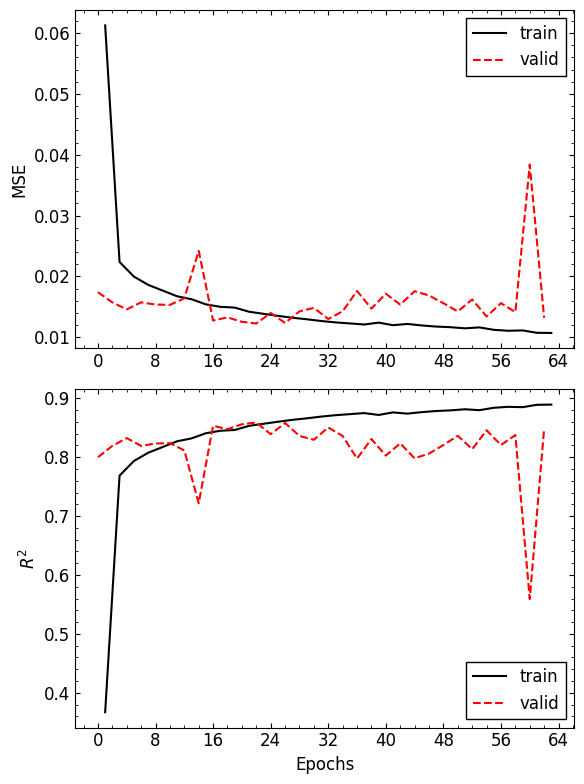

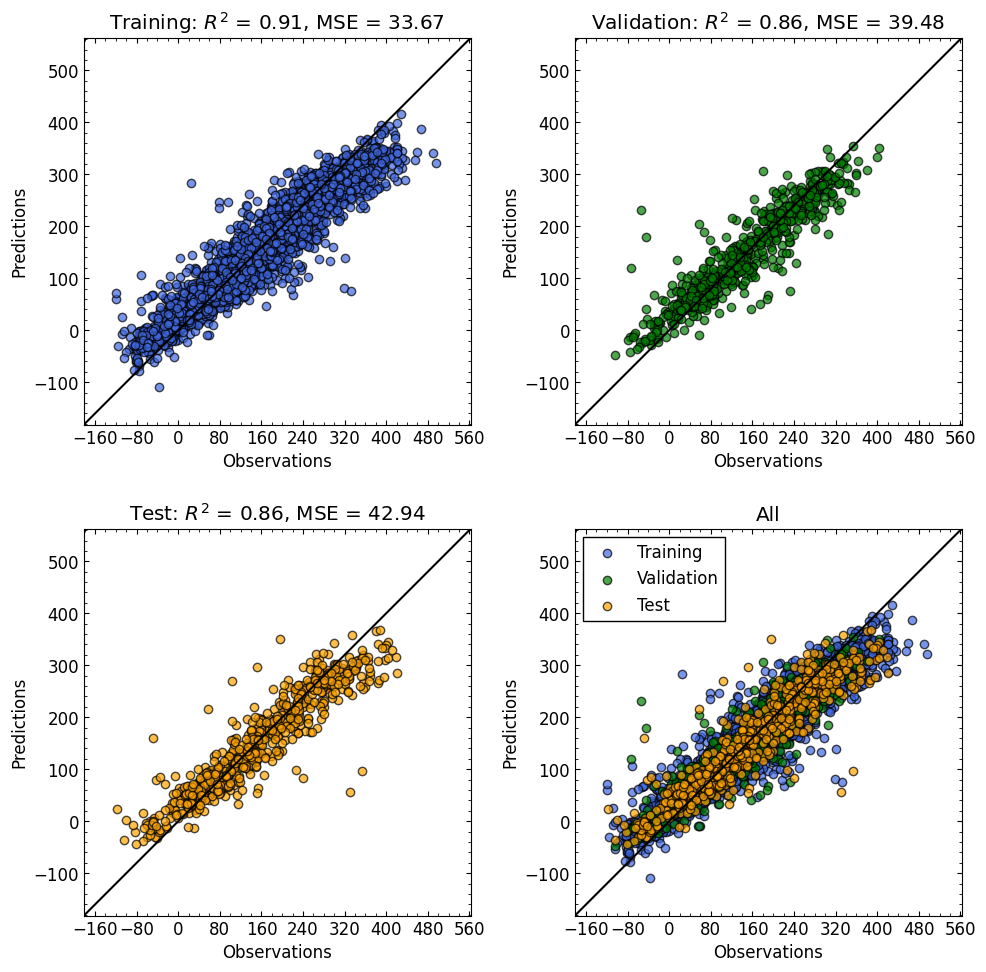

In [2]:
train.run(
    config_filepath=config_filepath
)